In [1]:
import pandas as pd
import numpy as np
import json

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## set up 

In [2]:
trial_data=pd.read_csv('data_files/eventseg_trialdata.csv',header=None)
question_data=pd.read_csv('data_files/eventseg_questiondata.csv',header=None)
event_data=pd.read_csv('data_files/eventseg_eventdata.csv',header=None)

In [3]:
exp2_subs=np.unique(question_data[515:][0]) # possible subjects that did this version of the study
print(len(exp2_subs))
print(exp2_subs)

15
['debug0mwmM:debug3GBn1' 'debug2VZ3NT:debugU3LGH6' 'debugBgmtV:debugyGVsK'
 'debugKOrYh:debug9Dhm5' 'debugTHBPt:debug6BsER' 'debugTTGHPA:debugIWAJF6'
 'debugYlh1Z:debugBamIv' 'debugZGE3Z:debugSIH46' 'debugfXoRq:debugNETH0'
 'debugfb2Ca:debugzC3ly' 'debughXUoc:debugoy6sE' 'debugkNzMy:debugCl2Vl'
 'debugksOcd:debugh6usg' 'debugtmqys:debugJ2BMd' 'debugvOtw0:debugo76XH']


In [4]:
idx_to_use=[]

for ppt in exp2_subs:
    idx_to_use.extend(np.where(trial_data[0]==ppt)[0])
    
actual_data=trial_data.iloc[idx_to_use,:]


In [5]:
idx_to_use=[]

for ppt in exp2_subs:
    if sum(question_data[0]==ppt) > 1: # if they actually got all the way to the end of the task
        idx_to_use.extend(np.where(question_data[0]==ppt)[0])
    
actual_question=question_data.iloc[idx_to_use,:]
actual_question.columns=['id','question','answer']
actual_question=actual_question.pivot(index='id',columns='question',values='answer')

In [6]:
actual_question.head()

question,comments,difficulty,engagement,instructionloops,switch_tabs,vid_quality
id,,,,,,
debug0mwmM:debug3GBn1,NaN,1,1,1,No,Yes
debugBgmtV:debugyGVsK,Got a bit lethargic by the end of it as some w...,3,3,1,No,Yes
debugKOrYh:debug9Dhm5,NaN,6,6,1,No,Yes
debugTTGHPA:debugIWAJF6,NaN,5,5,1,No,Yes
debugYlh1Z:debugBamIv,NaN,5,2,2,No,Yes


In [7]:
len(actual_question)

11

difficulty : M=4.00
engagement : M=4.55


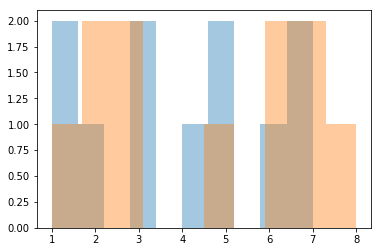

In [8]:
for question in ['difficulty','engagement']:
    
    print('%s : M=%0.2f' %(question, np.mean(np.array(actual_question[question],dtype=int))))
    plt.hist(np.array(actual_question[question],dtype=int),alpha=0.4)

In [9]:
print(np.array(actual_question['comments']))

[nan
 'Got a bit lethargic by the end of it as some were repeated, also was unusual to understand and not clear where you had already pressed for a change of event. Also, when the ball is falling or moving fast the frames always show the ball in different places when you flick it, so was unclear for a change of event then.'
 nan nan nan
 'I think they were similar videos for some and i reacted differently each time it confused me'
 nan
 'I did watch all of the videos, but I took a break in the middle to go and make tea.'
 'It was very interesting to partake in this study. Often I had to decide what was the best point in a transition. An example of this is would be deciding to include when a ball went off screen. Thank you, stay safe and healthy, and lastly good luck on the study!!'
 "Not sure if it's the program's problem or my keyboard's. Sometimes pressing my enter key leads to pausing the video (which I didn't want to). Also I did not see any purple border even when I replayed the v

In [10]:
for idx in actual_data.index:
    actual_data[3][idx]=json.loads(actual_data[3][idx])
    
actual_data.head()

np.save('eventseg_trialdata_dict',actual_data,allow_pickle=True)

/gpfs/milgram/project/turk-browne/users/tsy6/conda_envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/gpfs/milgram/project/turk-browne/users/tsy6/conda_envs/nlp/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


## Load in the data

In [10]:
actual_data=np.load('eventseg_trialdata_dict.npy',allow_pickle=True)

In [11]:
actual_data

array([['debug0mwmM:debug3GBn1', 0, 1612995811248,
        {'phase': 'INSTRUCTQUIZ', 'question': 'trueFalse1', 'answer': 'b'}],
       ['debug0mwmM:debug3GBn1', 1, 1612995811248,
        {'phase': 'INSTRUCTQUIZ', 'question': 'trueFalse2', 'answer': 'c'}],
       ['debug0mwmM:debug3GBn1', 2, 1612995825166,
        {'TrialName': 'containment_falling998_125ms_44.mp4', 'Boundaries': [], 'Boundary_On_Pause': [], 'Removed_Presses': [], 'IsInstruction': False, 'TrialOrder': 0}],
       ...,
       ['debugvOtw0:debugo76XH', 68, 1612998906317,
        {'TrialName': 'occlusion_falling2319_125ms_35.mp4', 'Boundaries': ['5.95', '8.82', '9.22', '11.35'], 'Boundary_On_Pause': [1, 1, 1, 1], 'Removed_Presses': [], 'IsInstruction': False, 'TrialOrder': 63}],
       ['debugvOtw0:debugo76XH', 69, 1612998906322,
        {'phase': 'postquestionnaire', 'status': 'begin'}],
       ['debugvOtw0:debugo76XH', 70, 1612998935742,
        {'phase': 'postquestionnaire', 'status': 'submit'}]], dtype=object)

In [12]:
real_trials=[x for x in actual_data[:,3] if 'TrialName' in x]
real_trials=[x for x in real_trials if len(x['Boundaries']) >= 1]
print(len(real_trials))

318


In [13]:
real_trials[:5]

[{'TrialName': 'containment_falling998_125ms_44.mp4',
  'Boundaries': ['5.44', '6.31'],
  'Boundary_On_Pause': [1, 1],
  'Removed_Presses': [],
  'IsInstruction': False,
  'TrialOrder': 1},
 {'TrialName': 'falling_falling316_125ms_58.mp4',
  'Boundaries': ['4.66', '4.88', '5.91', '6.13'],
  'Boundary_On_Pause': [1, 1, 1, 1],
  'Removed_Presses': [],
  'IsInstruction': False,
  'TrialOrder': 3},
 {'TrialName': 'collision_containment315_125ms_70.mp4',
  'Boundaries': ['2.77', '5.65'],
  'Boundary_On_Pause': [1, 1],
  'Removed_Presses': [],
  'IsInstruction': False,
  'TrialOrder': 5},
 {'TrialName': 'containment_occlusion5314_125ms_67.mp4',
  'Boundaries': ['0.83', '4.77', '6.21'],
  'Boundary_On_Pause': [1, 1, 1],
  'Removed_Presses': [],
  'IsInstruction': False,
  'TrialOrder': 7},
 {'TrialName': 'falling_occlusion998_125ms_39.mp4',
  'Boundaries': ['4.36', '5.02'],
  'Boundary_On_Pause': [1, 1],
  'Removed_Presses': [],
  'IsInstruction': False,
  'TrialOrder': 9}]

In [14]:
with open('boundary_dictionary.json') as f:
    boundary_info = json.load(f)
    
with open('length_dictionary.json') as f:
    length_info = json.load(f)

In [15]:
iti=200
boundary_info_sec={}
for uv in boundary_info:
    locations=np.hstack(list(boundary_info[uv].values()))
    
    locations_ms=[i*iti/1000 for i in locations]
    boundary_info_sec[uv]=locations_ms

In [229]:
# how I made the length_dictionary (had to do it outside of the notebook because I don't have ffprobe loaded)
#movie_folder='/gpfs/milgram/scratch/turk-browne/tsy6/physical_events/movies_est/'
#video_link=movie_folder+vid+'*'
#video_link
#duration = !ffprobe -v error -show_entries format=duration -of default=noprint_wrappers=1:nokey=1 {video_link}
#duration = 8.384000
#length_dict[vid] = duration

In [208]:
bin_size=5 # every 200 ms (1/5 = 0.200 seconds)

In [209]:
all_timecourses={}
percentages=[]
non_boundary_percentages=[]

plot=False

for vid in boundary_info_sec:
    print(vid)
    
    sub_trials=[x for x in real_trials if vid in x['TrialName']]
    print(len(sub_trials))

    duration=length_info[vid]
    
    duration_resample=duration*bin_size 

    # create an aggregate matrix of responses 
    output = np.zeros((np.int(np.round(duration_resample)), len(sub_trials)))

    for counter, ppt in enumerate(sub_trials):
        rounded_vals =  np.round(np.array(ppt['Boundaries'],dtype=float),decimals=1)

        if sum(rounded_vals*bin_size >= np.int(np.round(duration_resample))) > 0: # if any were at the end of the movie, ignore
            idx=np.where(rounded_vals*bin_size >= np.int(np.round(duration_resample)))[0]
            rounded_vals=np.delete(rounded_vals,idx)

        indices = np.array(rounded_vals*bin_size,dtype=int)
        output[indices,counter] = 1
    print(output.shape)

    average_keypresses = output.sum(axis=1)
    num_events=output.sum(axis=0)
    print('Number of events: %d-%d (average=%0.2f)' %(np.min(num_events),
                                                                 np.max(num_events),np.nanmean(num_events)))
    
    expert_bounds=np.array(boundary_info_sec[vid])*bin_size
    non_expert_bounds=np.delete(np.arange(len(average_keypresses)),np.array(expert_bounds,int))
        
    if plot == True:
        plt.plot(average_keypresses/len(sub_trials),color='midnightblue')
        plt.title(vid)
        plt.xlabel("time in movie")
        plt.ylabel("proportion responding to event boundary")
        plt.axis([0, len(average_keypresses), 0, 1])

        for b in expert_bounds:
            plt.axvline(b,color='darkgreen',linestyle='dashed')

        plt.legend(['subject responses','expert response'])

    
    all_timecourses[vid]=average_keypresses/len(sub_trials)
    percentages.extend(average_keypresses[np.array(expert_bounds,int)]/len(sub_trials))
    non_boundary_percentages.extend(average_keypresses[np.array(non_expert_bounds,int)]/len(sub_trials))
    
    

collision_collision311
10
(53, 10)
Number of events: 2-6 (average=3.50)
collision_collision312
10
(63, 10)
Number of events: 2-5 (average=2.90)
collision_containment315
9
(71, 9)
Number of events: 2-7 (average=4.22)
collision_containment5313
10
(63, 10)
Number of events: 2-7 (average=4.00)
collision_falling998
10
(60, 10)
Number of events: 1-9 (average=5.10)
collision_falling3998
10
(42, 10)
Number of events: 3-8 (average=5.10)
collision_occlusion315
10
(53, 10)
Number of events: 1-4 (average=2.20)
collision_occlusion3311
10
(44, 10)
Number of events: 1-4 (average=2.60)
containment_collision308
10
(52, 10)
Number of events: 1-5 (average=2.60)
containment_collision314
10
(56, 10)
Number of events: 1-4 (average=2.60)
containment_containment319
10
(34, 10)
Number of events: 1-3 (average=2.00)
containment_containment4320
10
(70, 10)
Number of events: 2-4 (average=3.00)
containment_falling998
10
(43, 10)
Number of events: 2-4 (average=2.90)
containment_falling2998
10
(39, 10)
Number of even

Boundaries; Mean percent overlap: 0.27027777777777773
pval vs 0: 1.0605147650653277e-19
Non-Boundaries; Mean percent overlap: 0.053899240855762594
pval vs 0: 2.353534297682805e-65
pval diff: 1.4764519315574673e-51


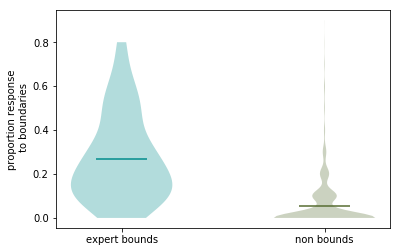

In [210]:
v=plt.violinplot(percentages,positions=[0],showextrema=False,showmeans=True)
v['bodies'][0].set_facecolor('darkcyan')
v['cmeans'].set_color('darkcyan')

v=plt.violinplot(non_boundary_percentages,positions=[1],showextrema=False,showmeans=True)
v['bodies'][0].set_facecolor('darkolivegreen')
v['cmeans'].set_color('darkolivegreen')

plt.xticks([0,1],['expert bounds','non bounds'])
plt.ylabel('proportion response\n to boundaries')

print('Boundaries; Mean percent overlap:',np.mean(percentages))
print('pval vs 0:',stats.ttest_1samp(percentages,0)[1])

print('Non-Boundaries; Mean percent overlap:',np.mean(non_boundary_percentages))
print('pval vs 0:',stats.ttest_1samp(non_boundary_percentages,0)[1])

print('pval diff:',stats.ttest_ind(percentages,non_boundary_percentages)[1])

In [211]:
len(percentages)

80

In [212]:
len(non_boundary_percentages)

1449

## Compare to experiment 1 (temporal probes)

In [213]:
exp1_data=np.load('trialdata_dict_55.npy',allow_pickle=True)

In [214]:
movie_loc='/gpfs/milgram/scratch/turk-browne/tsy6/physical_events/movies/'

In [215]:
for sub in np.unique(exp1_data[:,0]):
    sub_trials=exp1_data[exp1_data[:,0]==sub,3]
    #real_trials=[x for x in sub_trials if 'TrialName' in x]
    
    conf_vals=[]
    for trial in sub_trials:
        if 'TrialName' in trial:
            conf_vals.append(np.int(trial['Confidence']))
        else:
            conf_vals.append(np.nan)
    
    zscore_conf=(conf_vals-np.nanmean(conf_vals))/np.nanstd(conf_vals)

    for t, trial in enumerate(sub_trials):
        if 'TrialName' in trial:
            trial['Zscore_Conf']=zscore_conf[t]                     
                    
            
    exp1_data[exp1_data[:,0]==sub,3]=sub_trials

/gpfs/milgram/project/turk-browne/users/tsy6/conda_envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


In [216]:
exp1_trials=[x for x in exp1_data[:,3] if 'TrialName' in x]
print(len(exp1_trials))

5280


In [217]:
remove_extra=1

probe_names=[]
no_probe_names=[]

probes_space=[]
no_probes_space=[]

probes_confidence=[]
no_probes_confidence=[]

probes_conf_z=[]
no_probes_conf_z=[]

probes_pix=[]

extra_spaces=[]

for trial in exp1_trials:
    
    if len(trial['Spacebar'])==0:
        space_timing=-1
    elif len(trial['Spacebar'])>1:
        
        extra_spaces.append(trial['TrialName'])
        
        # do you want to remove the trials when the pressed the space bar multiple times? or just the first spacebar?
        if remove_extra==1: 
            space_timing=-1
        else: 
            space_timing=trial['Spacebar'][0]
            
    else:
        space_timing=trial['Spacebar'][0]
    
    if 'non-visible' in trial['TrialName']:
        no_probe_names.append(trial['TrialName'])
        no_probes_space.append(space_timing)
        no_probes_confidence.append(np.int(trial['Confidence']))
        no_probes_conf_z.append(float(trial['Zscore_Conf']))
        
    else:
        
        probe_names.append(trial['TrialName'])
        probes_space.append(space_timing)
        probes_confidence.append(np.int(trial['Confidence']))
        probes_conf_z.append(float(trial['Zscore_Conf']))
        
        file='pixel_changes/'+trial['TrialName'].split('/')[0]+'_pixel_changes.json'
        with open(file) as f:
            video_dict=json.load(f)
        
        avg_pix_change=video_dict[movie_loc+trial['TrialName']]
        probes_pix.append(avg_pix_change)
        

if remove_extra==1 and len(extra_spaces)>1:        
    print('*Ignoring %d trials (%0.2f percent) for multiple space bar presses' %(len(extra_spaces),len(extra_spaces)/len(exp1_trials)*100))
else:
    print('Using the first space bar press for %d trials for multiple space bar presses' %(len(extra_spaces)))

*Ignoring 96 trials (1.82 percent) for multiple space bar presses


In [218]:
detected=np.array(probes_space)
detected[detected>-1]=1

In [219]:
detected

array([ 1,  1, -1, ..., -1,  1,  1])

In [220]:
probes_num=[]

for i, probe in enumerate(probe_names):
    base=probe.split('/')[0]
    probe_num=probe.split('_')[-1].split('.')[0]
    probes_num.append(probe_num)
    
probes_num=np.array(probes_num,dtype=int)      
probes_time=[i*iti/1000 for i in probes_num]

In [221]:
base_names=[i.split('/')[0] for i in probe_names]
base_names[:5]

['containment_containment4320',
 'containment_occlusion3314',
 'occlusion_containment312',
 'falling_collision4998',
 'occlusion_occlusion307']

In [222]:

percentages_organized=np.zeros(len(probes_time))
for p in range(len(probes_time)):
    
    movie_length=length_info[base_names[p]]
    average_keypress=all_timecourses[base_names[p]]
    
    if probes_time[p]*bin_size >= np.int(np.round(movie_length)*bin_size): # if it was after the movie
        percentages_organized[p]=np.nan
    else:
        percentages_organized[p]=average_keypress[np.int(probes_time[p]*bin_size)]
    
    

In [223]:
temp=np.array(probes_space)
temp[temp>-1]=1
temp[temp==-1]=0

In [224]:
average_detection=[]
for percent in np.unique(percentages_organized):
    average_detection.append(np.nanmean(temp[np.where(percentages_organized==percent)[0]]))

(-0.6446846106534468, 0.012807197021505744)


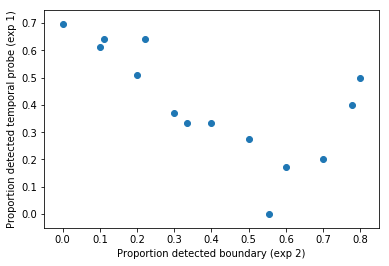

In [225]:
mask=~np.isnan(np.unique(percentages_organized))*~np.isnan(average_detection)
plt.scatter(np.unique(percentages_organized),average_detection)
plt.xlabel('Proportion detected boundary (exp 2)')
plt.ylabel('Proportion detected temporal probe (exp 1)')
print(stats.pearsonr(np.unique(percentages_organized)[mask],np.array(average_detection)[mask]))

In [226]:
temp=np.array(probes_space)
temp[temp>-1]=1
temp[temp==-1]=0

In [227]:

percentages_organized=np.zeros(len(np.unique(probe_names)))
detected_organized= np.zeros(len(np.unique(probe_names)))

for p in range(len(np.unique(probe_names))):
    
    indices=np.where(np.array(probe_names)==np.unique(probe_names)[p])[0]
    base_name=np.unique(probe_names)[p].split('/')[0]
    
    movie_length=length_info[base_name]
    average_keypress=all_timecourses[base_name]
    
    if probes_time[indices[0]]*bin_size >= np.int(np.round(movie_length)*bin_size): # if it was after the movie
        percentages_organized[p]=np.nan
    else:
        percentages_organized[p]=average_keypress[np.int(probes_time[indices[0]]*bin_size)]
        
    detected_organized[p]=np.mean(temp[indices])
    
    

(-0.3564401338596783, 1.8597386249336378e-22)


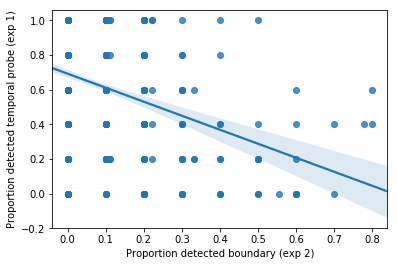

In [228]:
mask=~np.isnan(percentages_organized)*~np.isnan(detected_organized)
sns.regplot(percentages_organized,detected_organized)
plt.xlabel('Proportion detected boundary (exp 2)')
plt.ylabel('Proportion detected temporal probe (exp 1)')
print(stats.pearsonr(percentages_organized[mask],detected_organized[mask]))